# Housing Price Prediction

## Import Libraries and Modules

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


## Data Loading

Data is available on AWS at https://ddc-datascience.s3-website-us-west-1.amazonaws.com/Projects/Project.2-Housing/Housing.Data.csv

Data is housing data from the Boston area. Target is the price of the house, features are qualities of the house

In [2]:
url = 'http://ddc-datascience.s3-website-us-west-1.amazonaws.com/Projects/Project.2-Housing/Housing.Data.csv'
raw_housing_data = pd.read_csv(url)


In [3]:
raw_housing_data.shape


(2637, 81)

In [4]:
raw_housing_data.head()


,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,905101070,20,RL,62.0,14299,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2007,WD,Normal,115400
1,905101330,90,RL,72.0,10791,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
2,903454090,50,RM,50.0,9000,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,12,2007,WD,Normal,141000
3,533244030,60,FV,68.0,7379,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,254000
4,909252020,70,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2009,WD,Normal,155000


In [5]:
raw_housing_data.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
PID,2637.0,7.141301e+08,1.887527e+08,526301100.0,5.284770e+08,535453040.0,9.071870e+08,1.007100e+09
MS SubClass,2637.0,5.734926e+01,4.249909e+01,20.0,2.000000e+01,50.0,7.000000e+01,1.900000e+02
Lot Frontage,2188.0,6.916682e+01,2.335678e+01,21.0,5.800000e+01,68.0,8.000000e+01,3.130000e+02
Lot Area,2637.0,1.004469e+04,6.742550e+03,1300.0,7.436000e+03,9450.0,1.152600e+04,1.646600e+05
Overall Qual,2637.0,6.097459e+00,1.411522e+00,1.0,5.000000e+00,6.0,7.000000e+00,1.000000e+01
Overall Cond,2637.0,5.569966e+00,1.118262e+00,1.0,5.000000e+00,5.0,6.000000e+00,9.000000e+00
Year Built,2637.0,1.971289e+03,3.030699e+01,1872.0,1.954000e+03,1973.0,2.001000e+03,2.010000e+03
Year Remod/Add,2637.0,1.984203e+03,2.091308e+01,1950.0,1.965000e+03,1993.0,2.004000e+03,2.010000e+03
Mas Vnr Area,2614.0,1.018879e+02,1.795782e+02,0.0,0.000000e+00,0.0,1.640000e+02,1.600000e+03
BsmtFin SF 1,2636.0,4.384412e+02,4.496023e+02,0.0,0.000000e+00,368.0,7.320000e+02,5.644000e+03


In [6]:
raw_housing_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2637 entries, 0 to 2636
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2637 non-null   int64  
 1   MS SubClass      2637 non-null   int64  
 2   MS Zoning        2637 non-null   object 
 3   Lot Frontage     2188 non-null   float64
 4   Lot Area         2637 non-null   int64  
 5   Street           2637 non-null   object 
 6   Alley            180 non-null    object 
 7   Lot Shape        2637 non-null   object 
 8   Land Contour     2637 non-null   object 
 9   Utilities        2637 non-null   object 
 10  Lot Config       2637 non-null   object 
 11  Land Slope       2637 non-null   object 
 12  Neighborhood     2637 non-null   object 
 13  Condition 1      2637 non-null   object 
 14  Condition 2      2637 non-null   object 
 15  Bldg Type        2637 non-null   object 
 16  House Style      2637 non-null   object 
 17  Overall Qual  

## Data Cleaning

In [7]:
clean_housing_data = raw_housing_data.copy()


### Take Care of Nulls

In [8]:
null_percentage = raw_housing_data.isnull().mean()
columns_with_more_than_75_nulls = null_percentage[null_percentage > 0.75].index.tolist()
columns_with_more_than_75_nulls


['Alley', 'Pool QC', 'Fence', 'Misc Feature']

In [9]:
clean_housing_data.drop(columns=columns_with_more_than_75_nulls, inplace=True)
clean_housing_data.dropna(inplace=True, axis=0)
clean_housing_data.isna().sum().sum()


0

### Drop Identifier Columns

In [10]:
unique_counts = clean_housing_data.nunique()
columns_with_high_unique_values = unique_counts[unique_counts > 0.9 * len(clean_housing_data)].index.tolist()
clean_housing_data.drop(columns=columns_with_high_unique_values, inplace=True)


### Drop Unary Columns

In [11]:
unique_counts = clean_housing_data.nunique()
columns_with_one_unique_value = unique_counts[unique_counts == 1].index.tolist()
clean_housing_data.drop(columns=columns_with_one_unique_value, inplace=True)


### One Hot Encode Categorical Columns

In [12]:
clean_housing_data.select_dtypes(include='object').nunique()


MS Zoning          5
Street             2
Lot Shape          4
Land Contour       4
Lot Config         5
Land Slope         3
Neighborhood      26
Condition 1        9
Condition 2        5
Bldg Type          5
House Style        8
Roof Style         6
Roof Matl          6
Exterior 1st      13
Exterior 2nd      14
Mas Vnr Type       4
Exter Qual         4
Exter Cond         4
Foundation         4
Bsmt Qual          4
Bsmt Cond          5
Bsmt Exposure      4
BsmtFin Type 1     6
BsmtFin Type 2     6
Heating            3
Heating QC         4
Central Air        2
Electrical         3
Kitchen Qual       4
Functional         6
Fireplace Qu       5
Garage Type        6
Garage Finish      3
Garage Qual        4
Garage Cond        5
Paved Drive        3
Sale Type          9
Sale Condition     5
dtype: int64

In [13]:
clean_housing_data = pd.get_dummies(clean_housing_data, drop_first=True)
clean_housing_data.head()


,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_VWD,Sale Type_WD,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
2,50,50.0,9000,6,6,1937,1950,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,1,0
3,60,68.0,7379,8,5,2000,2000,0.0,484.0,0.0,...,0,0,0,0,0,1,0,0,1,0
5,20,70.0,8521,5,5,1967,1967,0.0,842.0,0.0,...,0,0,0,0,0,1,0,0,1,0
7,50,66.0,21780,6,7,1918,1950,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,1,0
11,120,41.0,6289,6,5,2005,2006,256.0,762.0,0.0,...,0,0,0,0,0,1,0,0,1,0


## Data Processing

In [17]:
X = clean_housing_data.drop(columns='SalePrice')
y = clean_housing_data['SalePrice']


### Train Linear Regression Model

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


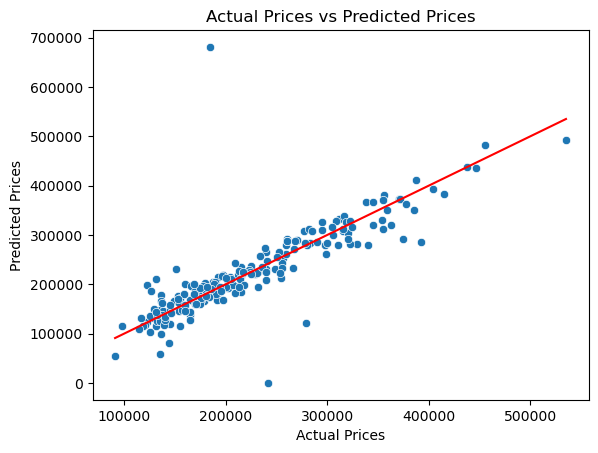

In [34]:
sns.scatterplot(x=y_test, y=y_pred) 
sns.lineplot(x=y_test, y=y_test, color='red')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()


### Residual Analysis

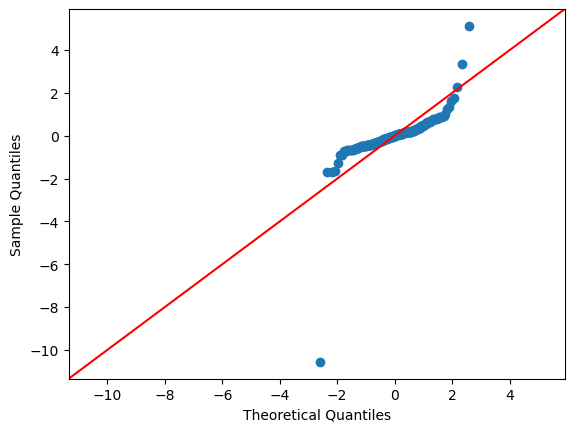

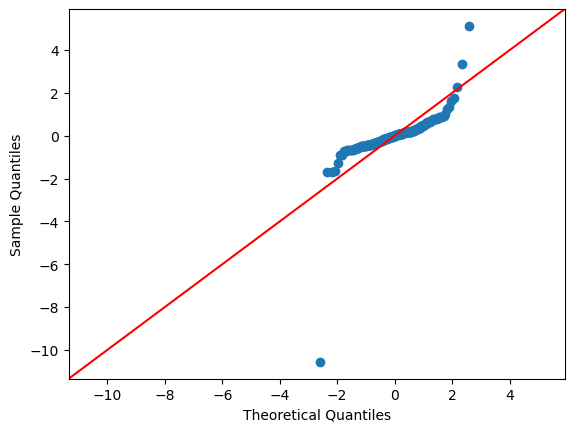

In [40]:
residuals = y_test - y_pred
sm.qqplot(residuals, fit=True, line ='45')


### Model Performance

In [42]:
rmspe = (np.sqrt(np.mean(np.square((y_test - y_pred) / y_test)))) * 100
print(f"RMSPE: {rmspe}%")


RMSPE: 24.420742404500217%


## Feature Selection

- Get features most correlated with target

In [63]:
correlations = clean_housing_data.corr()['SalePrice'].abs().sort_values(ascending=False)
high_correlation_features = correlations[(correlations > 0.5) & (correlations < 1)].index.tolist()
high_correlation_features


['Overall Qual',
 'Gr Liv Area',
 'Garage Cars',
 'Garage Area',
 'Total Bsmt SF',
 'Exter Qual_TA',
 '1st Flr SF',
 'Kitchen Qual_TA',
 'Year Remod/Add',
 'Garage Yr Blt',
 'Foundation_PConc',
 'Year Built',
 'Mas Vnr Area',
 'TotRms AbvGrd',
 'Full Bath']

## Data Processing Part 2

In [64]:
X = clean_housing_data[high_correlation_features]
y = clean_housing_data['SalePrice']


In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


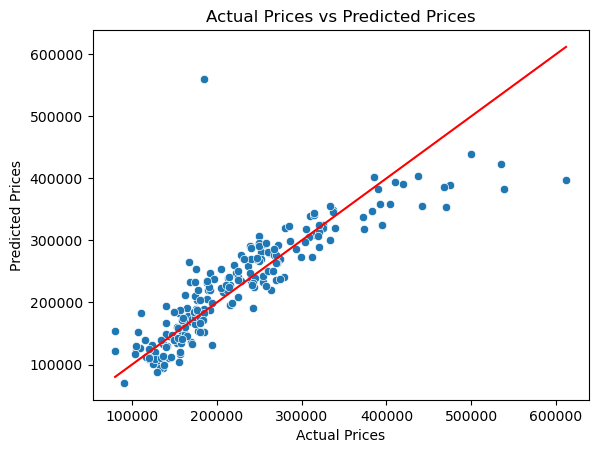

In [66]:
sns.scatterplot(x=y_test, y=y_pred) 
sns.lineplot(x=y_test, y=y_test, color='red')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()


In [67]:
rmspe = (np.sqrt(np.mean(np.square((y_test - y_pred) / y_test)))) * 100
print(f"RMSPE: {rmspe}%")


RMSPE: 22.673327754847033%


### Cross Validation

In [79]:
def cross_validate(model, X, y, cv=5) -> np.array:
    """
    Cross validate a model using the root mean squared percentage error (RMSPE) as the scoring metric.

    Args:
        X (np.array): Predictors
        y (np.array): Target
        cv (int, optional): Number of cross validation loops to perform. Defaults to 5.

    Returns:
        np.array[float]: Array of RMSPE values for each cross validation loop
    """
    rmspe = np.zeros(cv)
    
    for i in range(cv):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        rmspe[i] = (np.sqrt(np.mean(np.square((y_test - y_pred) / y_test)))) * 100
        
    return rmspe



In [70]:
rmspe_scores = cross_validate(LinearRegression(),X, y, cv=100)
round(rmspe_scores.mean(), 2)


23.55

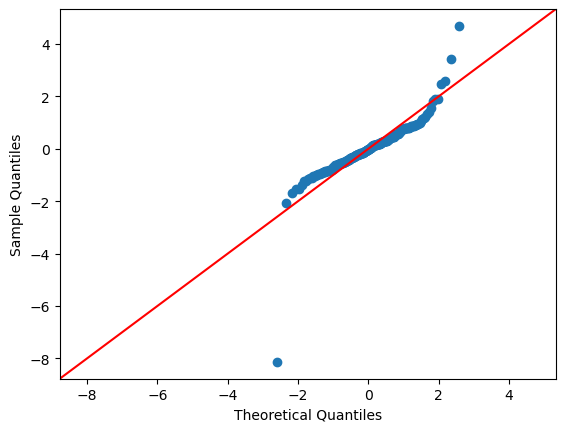

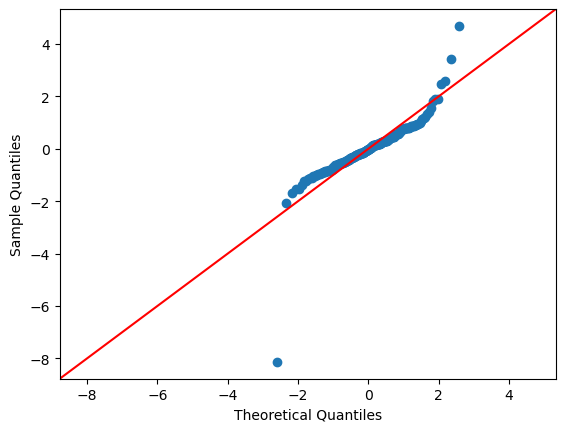

In [71]:
residuals = y_test - y_pred
sm.qqplot(residuals, fit=True, line ='45')


## Data Processing Part 3

In [ ]:
X = clean_housing_data[high_correlation_features]
y = clean_housing_data['SalePrice']


### Train a Random Forest Model

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_test, y_test)



0.8784924265508527

In [86]:
rmspe = (np.sqrt(np.mean(np.square((y_test - y_pred) / y_test)))) * 100
rmspe


15.189342132156927

In [87]:
cross_validate(RandomForestRegressor(n_estimators=100), X, y, cv=100).mean()


27.813396592310504